In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import math
import pylab 

In [2]:
exhaustive = pd.read_table("Exhaustive_set.dat", sep=",")

In [3]:
exhaustive

,X,Y,U,V
0,1,1,0.000,0.00
1,2,1,0.000,0.00
2,3,1,0.000,0.00
3,4,1,0.000,0.00
4,5,1,0.000,0.00
5,6,1,0.000,0.00
6,7,1,0.000,0.00
7,8,1,1.686,85.40
8,9,1,1.771,87.73
9,10,1,0.023,0.00


In [4]:
exhaustive.describe()

,X,Y,U,V
count,78000.000000,78000.000000,78000.000000,78000.000000
mean,130.500000,150.500000,266.043819,277.978584
std,75.055461,86.602614,488.451786,249.846419
min,1.000000,1.000000,0.000000,0.000000
25%,65.750000,75.750000,6.673750,67.797500
50%,130.500000,150.500000,56.902000,221.250000
75%,195.250000,225.250000,316.350750,429.342500
max,260.000000,300.000000,9499.507800,1631.160000


In [5]:
sample = pd.read_table("walker.dat")

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 6 columns):
I    470 non-null int64
X    470 non-null int64
Y    470 non-null int64
V    470 non-null float64
U    470 non-null float64
T    470 non-null int64
dtypes: float64(2), int64(4)
memory usage: 22.1 KB


In [7]:
sample

,I,X,Y,V,U,T
0,1,11,8,0.0,1.000000e+31,2
1,2,8,30,0.0,1.000000e+31,2
2,3,9,48,224.4,1.000000e+31,2
3,4,8,69,434.4,1.000000e+31,2
4,5,9,90,412.1,1.000000e+31,2
5,6,10,110,587.2,1.000000e+31,2
6,7,9,129,192.3,1.000000e+31,2
7,8,11,150,31.3,1.000000e+31,2
8,9,10,170,388.5,1.000000e+31,2
9,10,8,188,174.6,1.000000e+31,2


In [8]:
sample.describe()

,I,X,Y,V,U,T
count,470.000000,470.000000,470.000000,470.000000,4.700000e+02,470.000000
mean,235.500000,111.089362,141.221277,435.298723,4.148936e+30,1.904255
std,135.821574,70.894682,77.968954,299.882302,4.932287e+30,0.294554
min,1.000000,8.000000,8.000000,0.000000,0.000000e+00,1.000000
25%,118.250000,51.000000,80.000000,184.600000,2.302000e+02,2.000000
50%,235.500000,89.000000,139.500000,424.000000,1.382250e+03,2.000000
75%,352.750000,170.000000,208.000000,640.850000,1.000000e+31,2.000000
max,470.000000,251.000000,291.000000,1528.100000,1.000000e+31,2.000000


In [9]:
testing = exhaustive[(exhaustive['X'] >= 11) & (exhaustive['X'] <= 20) & (exhaustive['Y'] >= 241) & (exhaustive['Y'] <= 250)]
testing.describe()

,X,Y,U,V
count,100.000000,100.000000,100.000000,100.000000
mean,15.500000,245.500000,19.092960,97.558800
std,2.886751,2.886751,9.884783,26.428302
min,11.000000,241.000000,0.007000,0.000000
25%,13.000000,243.000000,14.227750,81.457500
50%,15.500000,245.500000,17.619000,100.265000
75%,18.000000,248.000000,24.597500,116.007500
max,20.000000,250.000000,55.476000,145.180000


In [10]:
test_u = []
test_v = []
for i in range(9, -1, -1):
    record = testing[10*i:10*i+10]
    test_u.append(record["U"])
    test_v.append(record["V"])

Text(33.0, 0.5, 'V values')

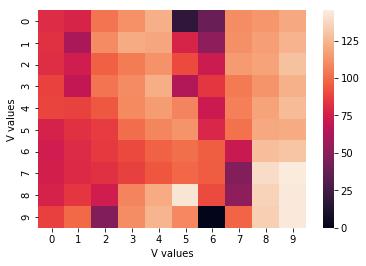

In [11]:
sns.heatmap(test_v)
plt.xlabel('V values')
plt.ylabel('V values')

Text(33.0, 0.5, 'U values')

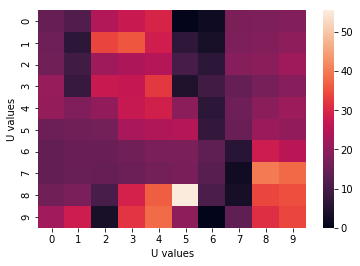

In [12]:
sns.heatmap(test_u)
plt.xlabel('U values')
plt.ylabel('U values')

Text(0.5, 0, 'Frequency Distribution of U')

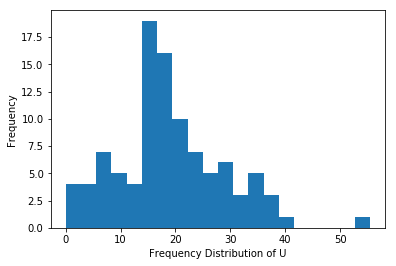

In [13]:
testing["U"].plot.hist(bins=20)
plt.xlabel('Frequency Distribution of U')

Text(0.5, 0, 'Frequency Distribution of V')

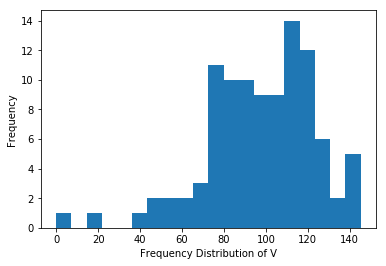

In [14]:
testing["V"].plot.hist(bins=20)
plt.xlabel('Frequency Distribution of V')

Text(0, 0.5, 'Cumulative Frequency(%)')

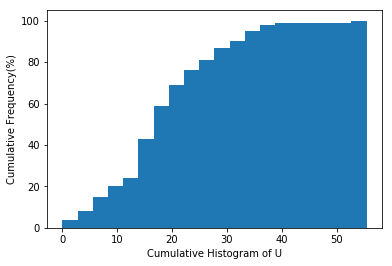

In [15]:
testing["U"].plot.hist(bins=20, cumulative=True)
plt.xlabel('Cumulative Histogram of U')
plt.ylabel('Cumulative Frequency(%)')

Text(0, 0.5, 'Cumulative Frequency(%)')

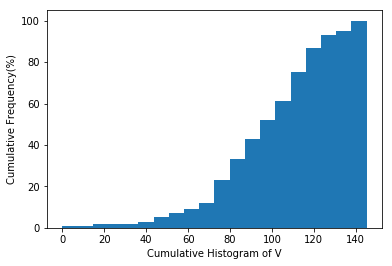

In [16]:
testing["V"].plot.hist(bins=20, cumulative=True)
plt.xlabel('Cumulative Histogram of V')
plt.ylabel('Cumulative Frequency(%)')

Text(0, 0.5, 'Cumulative Frequency(%)')

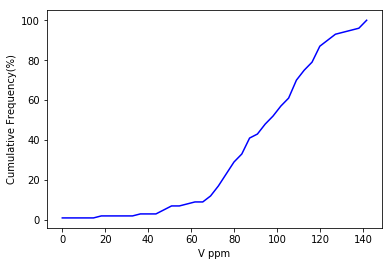

In [17]:
values, base = np.histogram(testing["V"], bins=40)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='blue')
plt.xlabel('V ppm')
plt.ylabel('Cumulative Frequency(%)')
#mean = np.mean(testing["V"])
#variance = np.std(testing["V"])
#list(map(lambda x: (1/(math.sqrt(2*math.pi)*variance))*(math.pow(math.e, -0.5*math.pow((x - mean)/variance, 2))), base[:-1]))

Text(0, 0.5, 'Cumulative Frequency(%)')

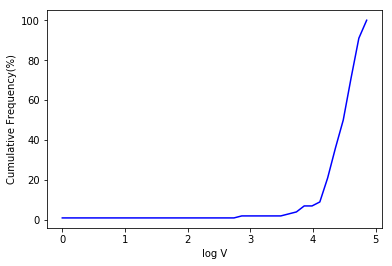

In [18]:
log_testing = []
for i in testing["V"]:
    if(i != 0):
        log_testing.append(math.log(i))
    else:
        log_testing.append(i)
log_testing
values, base = np.histogram(log_testing, bins=40)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='blue')
plt.xlabel('log V')
plt.ylabel('Cumulative Frequency(%)')

In [19]:
print("MEAN: ", np.mean(testing["V"]))
print("FIRST QUARTILE: ", np.percentile(testing["V"], 25))
print("MEDIAN: " , np.percentile(testing["V"], 50))
print("LAST QUARTILE: ", np.percentile(testing["V"], 75))
print("VARIANCE: ", np.var(testing["V"]))
print("STANDARD DEVIATION: ", np.std(testing["V------"]))
print("INTERQUARTILE RANGE: ", np.percentile(testing["V"], 75) - np.percentile(testing["V"], 25))
print("COEFFICIENT OF SKEWNESS: ", scipy.stats.skew(testing["V"]))
print("COEFFICIENT OF VARIANCE: ", scipy.stats.variation(testing["V"]))


MEAN:  97.55879999999999
FIRST QUARTILE:  81.45750000000001
MEDIAN:  100.265
LAST QUARTILE:  116.0075
VARIANCE:  691.4705825599999
STANDARD DEVIATION:  26.29582823491209
INTERQUARTILE RANGE:  34.54999999999998
COEFFICIENT OF SKEWNESS:  -0.7791427658905636
COEFFICIENT OF VARIANCE:  0.26953825011082644


In [20]:
print("MEAN: ", np.mean(testing["U"]))
print("FIRST QUARTILE: ", np.percentile(testing["U"], 25))
print("MEDIAN: " , np.percentile(testing["U"], 50))
print("LAST QUARTILE: ", np.percentile(testing["U"], 75))
print("VARIANCE: ", np.var(testing["U"]))
print("STANDARD DEVIATION: ", np.std(testing["U"]))
print("INTERQUARTILE RANGE: ", np.percentile(testing["U"], 75) - np.percentile(testing["U"], 25))
print("COEFFICIENT OF SKEWNESS: ", scipy.stats.skew(testing["U"]))
print("COEFFICIENT OF VARIANCE: ", scipy.stats.variation(testing["U"]))


MEAN:  19.092960000000005
FIRST QUARTILE:  14.22775
MEDIAN:  17.619
LAST QUARTILE:  24.597500000000004
VARIANCE:  96.73183843839999
STANDARD DEVIATION:  9.835234539064128
INTERQUARTILE RANGE:  10.369750000000003
COEFFICIENT OF SKEWNESS:  0.5664849736725455
COEFFICIENT OF VARIANCE:  0.5151236130523568


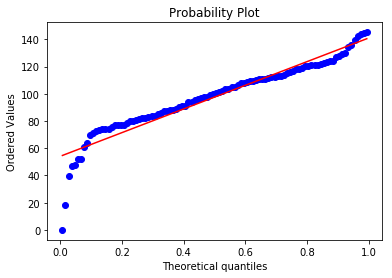

In [21]:
v, x = scipy.stats.probplot(testing["V"], dist="uniform", plot=pylab)
pylab.show()

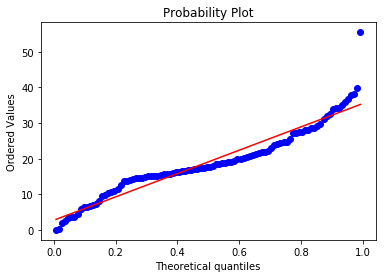

In [22]:
u, x = scipy.stats.probplot(testing["U"], dist="uniform", plot=pylab)
pylab.show()

Text(0, 0.5, 'U Quantiles')

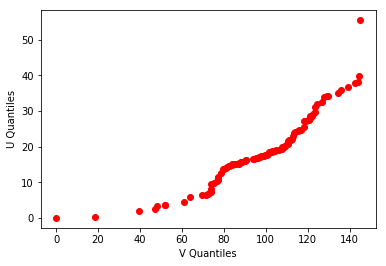

In [23]:
plt.plot(v[1], u[1], 'ro')
plt.xlabel('V Quantiles')
plt.ylabel('U Quantiles')

Text(0, 0.5, 'U ppm')

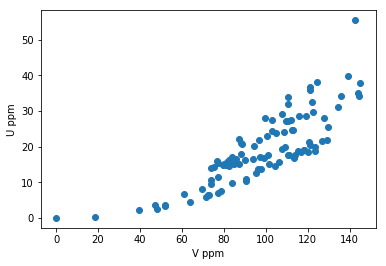

In [24]:
plt.scatter(testing["V"], testing["U"])
plt.xlabel("V ppm")
plt.ylabel("U ppm")

In [25]:
print("CORRELATION COEFFICIENT: ", np.corrcoef(x=testing["U"], y = testing["V"])[0][1])
print("RANK CORRELATION COEFFICIENT: ", scipy.stats.spearmanr(testing["U"], testing["V"])[0])


CORRELATION COEFFICIENT:  0.8377433020665386
RANK CORRELATION COEFFICIENT:  0.8550066307182479


In [26]:
a = np.corrcoef(x=testing["U"], y = testing["V"])[0][1] * np.std(testing["V"])/np.std(testing["U"])
b = np.mean(testing["V"]) - a*np.mean(testing["U"])

Text(0, 0.5, 'U ppm')

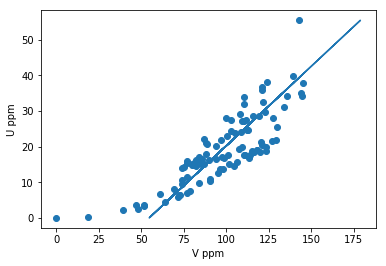

In [27]:
plt.scatter(testing["V"], testing["U"])
plt.plot(a*testing["U"]+b, testing["U"])
plt.xlabel("V ppm")
plt.ylabel("U ppm")

Text(0, 0.5, 'V ppm')

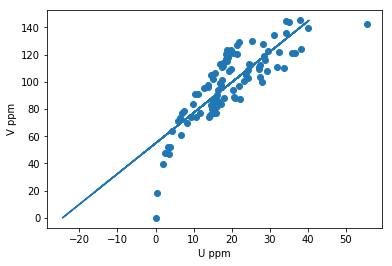

In [28]:
plt.scatter(testing["U"], testing["V"])
plt.plot((testing["V"]-b)/a, testing["V"])
plt.xlabel("U ppm")
plt.ylabel("V ppm")

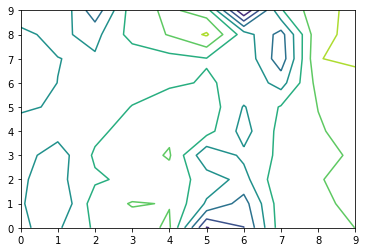

In [29]:
plt.contour(test_v)

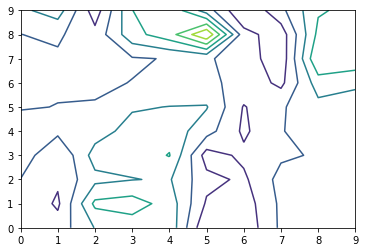

In [30]:
plt.contour(test_u)

In [31]:
print(testing[(testing['X'] == 11) & (testing['Y'] == 241)]['U'])

62410    22.271
Name: U, dtype: float64


In [32]:
variogram = [[0 for i in range(10)] for j in range(10)]
for h_i in range(10):
    for h_j in range(10):
        #print("\nH: (", h_i, ",", h_j, ")", sep="")
        #print("All pairs")
        count = 0
        for i in range(11, 21):
            for j in range(241, 251):
                if i+h_i <= 20 and j+h_j <= 250:
                    #print("(",i+h_i ,",", j+h_j, ")", sep="", end=" ")
                    count += 1
                    variogram[h_i][h_j] += (float(testing[(testing['X'] == i) & (testing['Y'] == j)]['U']) - float(testing[(testing['X'] == i+h_i) & (testing['Y'] == j+h_j)]['U']))**2
                else:
                    break
        variogram[h_i][h_j]/= 2*count
pd.DataFrame(variogram)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,32.517490,41.371020,46.218134,57.375017,80.122795,101.968633,119.934791,155.916657,84.264173
1,79.363314,77.999740,78.186094,82.905398,92.062113,106.214477,130.094270,162.650254,223.486780,162.907916
2,147.960966,139.148537,122.157396,109.183139,111.437111,125.585800,136.908696,164.286731,227.692025,207.413206
3,146.555752,141.384079,113.783896,107.516065,101.154391,103.273644,99.364246,127.738069,170.976065,121.297901
4,90.332617,76.901504,68.681946,69.707795,63.498966,76.000206,86.779597,98.031088,145.658103,121.146722
5,66.841790,48.328403,29.411540,38.961486,47.838278,51.311990,62.018233,78.238630,126.493427,194.260874
6,73.321734,71.372711,60.674464,47.782408,37.527883,35.542324,37.911567,47.854023,73.536476,112.105992
7,75.051742,73.015838,53.455903,28.219186,17.842569,22.099211,26.510511,30.448887,36.671276,58.530839
8,71.755109,58.143516,32.200284,12.269181,9.004490,9.071636,13.220293,6.982142,10.885755,28.491325
9,64.796700,48.771816,28.222161,11.093000,11.837773,10.981729,12.078132,5.373091,3.096326,7.442082


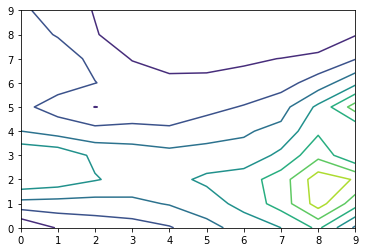

In [33]:
plt.contour(variogram)

Text(0, 0.5, 'Variogram')

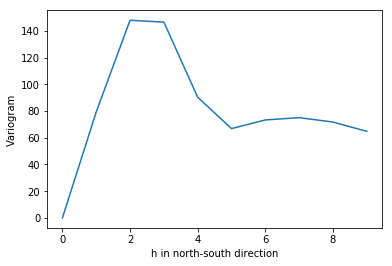

In [34]:
plt.plot(list(list(zip(*variogram))[0]))
plt.xlabel('h in north-south direction')
plt.ylabel('Variogram')

Text(0, 0.5, 'Variogram')

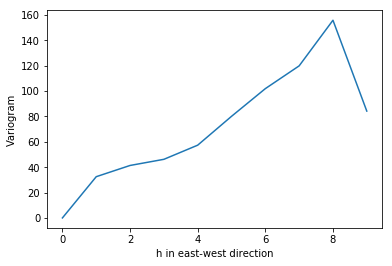

In [35]:
plt.plot(variogram[0])
plt.xlabel('h in east-west direction')
plt.ylabel('Variogram')

In [36]:
variogram = [[0 for i in range(10)] for j in range(10)]
for h_i in range(10):
    for h_j in range(10):
        #print("\nH: (", h_i, ",", h_j, ")", sep="")
        #print("All pairs")
        count = 0
        for i in range(11, 21):
            for j in range(241, 251):
                if i+h_i <= 20 and j+h_j <= 250:
                    #print("(",i+h_i ,",", j+h_j, ")", sep="", end=" ")
                    count += 1
                    variogram[h_i][h_j] += (float(testing[(testing['X'] == i) & (testing['Y'] == j)]['V']) - float(testing[(testing['X'] == i+h_i) & (testing['Y'] == j+h_j)]['V']))**2
                else:
                    break
        variogram[h_i][h_j]/= 2*count
pd.DataFrame(variogram)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,156.515927,239.932767,261.719670,326.985902,443.041986,577.008371,645.394360,845.073145,732.957750
1,552.775843,428.730904,404.241217,466.352152,598.399019,694.284892,804.729154,1017.444496,1458.567500,1847.267372
2,1000.516623,857.308247,781.448797,767.314245,805.038703,900.684049,980.539242,1174.145794,1612.508269,2204.882700
3,1004.764351,871.903956,751.754787,723.102202,696.851502,734.482627,721.041075,942.281619,1204.089914,1547.464014
4,531.236305,439.387596,400.545706,367.880798,332.060287,362.192627,408.706458,382.991553,414.605075,677.452217
5,414.302276,256.437390,217.929471,262.698001,355.782853,370.843960,403.579548,500.712623,665.803215,1241.246790
6,612.256693,542.315361,520.951266,471.322748,449.832906,478.417650,497.415294,567.811183,641.024800,868.493425
7,840.480805,844.767043,791.231006,703.453240,703.118700,798.352820,837.486508,913.941983,909.101600,1012.774983
8,1167.654093,1089.130047,931.151059,801.625771,740.464554,769.418960,740.421331,677.201092,515.865062,282.938000
9,1295.318115,1202.115067,1098.846894,987.438736,1013.809108,1096.316940,1063.654612,993.126417,800.041625,540.218450


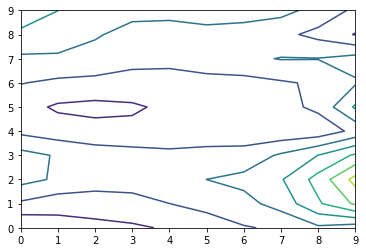

In [37]:
plt.contour(variogram)

Text(0, 0.5, 'Variogram')

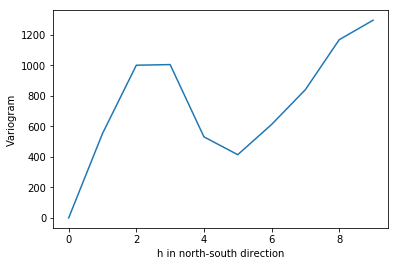

In [38]:
plt.plot(list(list(zip(*variogram))[0]))
plt.xlabel('h in north-south direction')
plt.ylabel('Variogram')


Text(0, 0.5, 'Variogram')

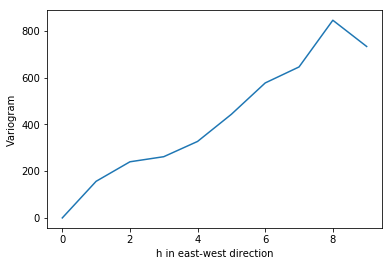

In [39]:
plt.plot(variogram[0])
plt.xlabel('h in east-west direction')
plt.ylabel('Variogram')